In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA


# 13.1场景介绍

# 13.2数据准备

In [19]:
data=pd.read_csv(r"./dataset/creditcardfraud.csv")#默认第一行为行标题

In [20]:
data.shape

(284807, 31)

In [21]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [22]:
# 设定随机数种子
np.random.seed(seed=2020)
# 读取数据
data=pd.read_csv(r"./dataset/creditcardfraud.csv")
# 采样
sample=data.sample(frac=0.1)
sample.shape

(28481, 31)

In [23]:
sample.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
211253,138331.0,-0.424849,1.440450,1.144727,2.770542,1.274736,-0.266094,1.160302,-0.151599,-1.942956,...,0.270038,0.812179,-0.253067,0.072351,-0.149161,0.011216,0.139467,0.183261,1.71,0
216519,140515.0,1.923825,-0.285707,-1.730333,-0.046817,1.372527,1.705817,-0.140174,0.363828,0.511349,...,-0.173432,-0.196649,0.340552,-1.285473,-0.372171,0.412211,-0.005250,-0.075931,10.60,0
280714,169705.0,1.928541,-0.338794,-0.773928,1.023823,0.027824,0.601129,-0.608708,0.282794,0.857511,...,0.156631,0.482619,0.086723,-0.016709,-0.023490,-0.589910,0.033751,-0.042676,25.00,0


In [24]:
sample['Class'].value_counts()

0    28432
1       49
Name: Class, dtype: int64

In [25]:
sample[['Time','Amount','V1','V2','V3']].describe()

,Time,Amount,V1,V2,V3
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,95081.280749,87.202118,0.026534,0.011319,-0.007368
std,47483.822980,231.158456,1.919344,1.582511,1.493663
min,1.000000,0.000000,-35.698345,-40.978852,-29.468732
25%,54476.000000,5.850000,-0.894757,-0.606529,-0.897072
50%,85329.000000,22.470000,0.038758,0.070498,0.184776
75%,139690.000000,78.000000,1.322692,0.813802,1.025286
max,172784.000000,7712.430000,2.418802,15.876923,4.101716


In [26]:
import math

math.log(1)

0.0

In [27]:
# 特征转换
sample.Time = sample.Time.map(lambda x: divmod(x, 3600)[0])
sample.Amount = sample.Amount.map(lambda x: math.log(x+1))

In [28]:
sample[['Time','Amount','V1','V2','V3']].describe()

,Time,Amount,V1,V2,V3
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,25.920122,3.158847,0.026534,0.011319,-0.007368
std,13.181489,1.649913,1.919344,1.582511,1.493663
min,0.000000,0.000000,-35.698345,-40.978852,-29.468732
25%,15.000000,1.924249,-0.894757,-0.606529,-0.897072
50%,23.000000,3.155723,0.038758,0.070498,0.184776
75%,38.000000,4.369448,1.322692,0.813802,1.025286
max,47.000000,8.950718,2.418802,15.876923,4.101716


数据正规化与标准化

在整个知识发现的过程中，数据挖掘之前，数据预处理起着至关重要的作用。
其中首要步骤就是数据的正规化处理。
在处理不同单元和尺度参数时，这一步就显得非常重要。
例如，一些数据挖掘技术适用欧氏距离，因此，所有的参数应该要用相同的单位才能进行比较。

重新缩放数据通常有两种方法：正规化和标准化。
正规化，即将所有的变量都归一化到[0,1]的尺度范围内。

标准化，是在原数据的分布统计基础上转化为具有零均值和单位方差。

这两种方法各有弊端。
如果你的数据集是离散的，正规化数据将会使那些“正常”的数据间形成非常小的间隔。
一般来说，大多数据集都是离散的。当使用标准化后的数据时，你假设你的数据是由高斯法（具有一定的均值和标准差）产生的。
但这在实际情况中可能不会发生。

对于正规化，特定场景下最大值最小值是变化的，另外，最大值与最小值非常容易受异常点影响，所以这种方法鲁棒性（产品稳定性）较差，只适合传统精确小数据场景。所以一般都不使用归一化

而标准化在已有样本足够多的情况下比较稳定，适合现代嘈杂大数据场景。


In [29]:
from sklearn.preprocessing import Normalizer
# 解释变量
x_cols=sample.columns.tolist()
x_cols.remove('Class')
# 正则化
sample[x_cols]  = Normalizer().fit_transform(sample[x_cols])

In [30]:
# from sklearn.preprocessing import StandardScaler
# # 解释变量
# x_cols=sample.columns.tolist()
# x_cols.remove('Class')
# # Z-score标准化
# # sample[x_cols] = StandardScaler().fit_transform(sample[x_cols])

In [34]:
sample[['Time','Amount','V1','V2','V3']].describe()

,Time,Amount,V1,V2,V3
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,0.920979,0.156588,-0.000484,0.003079,0.018668
std,0.164448,0.130943,0.087375,0.070786,0.076230
min,0.000000,0.000000,-0.670126,-0.659682,-0.498987
25%,0.932531,0.065060,-0.040352,-0.024045,-0.026987
50%,0.976246,0.116176,0.001098,0.002672,0.007419
75%,0.988923,0.211508,0.055643,0.030650,0.053578
max,0.998483,0.908550,0.457601,0.494900,0.613423


 # 13.3建模

Elbow Criterion

对于k-means的k，可通过Elbow Criterion确定k的大小：
在下面的误差平方和图中，拐点（bend or elbow）的位置对应的x轴即k-means聚类给出的合适的类的个数。

由下图可以看出，该方法给出合理的类别个数是3个或4个。

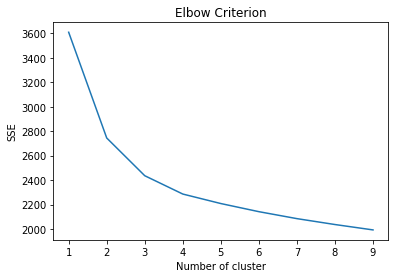

In [35]:
# 通过Elbow Criterion确定K
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(sample[x_cols])
    sse[k] = kmeans.inertia_
# 画出组内的平方和和提取的聚类个数的对比
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('Elbow Criterion')
plt.show()

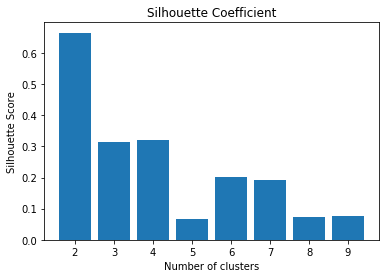

In [36]:
# 使用轮廓系数确定K
from sklearn.metrics import silhouette_score
silhouette_scores = [] 
for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(sample[x_cols], KMeans(n_clusters = n_cluster).fit_predict(sample[x_cols]))) 
    Ｋ
# 画出结果，使用silhouette_score包中指标推荐的聚类个数
k =list(range(2,10))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title('Silhouette Coefficient')
plt.show() 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

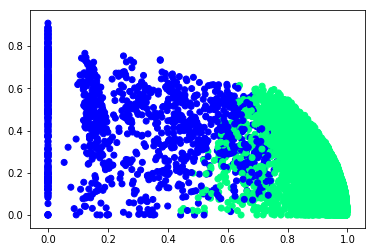

In [40]:
from sklearn.cluster import KMeans
# K-means训练
kmeans = KMeans(n_clusters=2)
kmeans.fit(sample[x_cols])

# 聚类效果可视化
plt.scatter(sample['Time'], sample['Amount'],  
           c = KMeans(n_clusters = 2).fit_predict(sample[x_cols]), cmap =plt.cm.winter) 
plt.show() 

In [42]:
# # Step size of the mesh. Decrease to increase the quality of the VQ.
# h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# # Plot the decision boundary. For that, we will assign a color to each
# x_min, x_max = sample['Time'].min() - 1, sample['Time'].max() + 1
# y_min, y_max = sample['Amount'].min() - 1, sample['Amount'].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# # Obtain labels for each point in mesh. Use last trained model.

# # https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
# # https://www.geeksforgeeks.org/differences-flatten-ravel-numpy/
# # Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Z = kmeans.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)   
# plt.figure(1)
# # https://stackoverflow.com/questions/16661790/difference-between-plt-close-and-plt-clf
# plt.clf()
# plt.imshow(Z, interpolation='nearest',
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=plt.cm.winter,
#            aspect='auto', origin='lower')

# plt.plot(sample['Time'], sample['Amount'], 'k.', markersize=2)
# # Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='o', s=10, linewidths=3,
#             color='w', zorder=10)
# plt.title('K-means clustering on the credit card fraud dataset (PCA-reduced data)\n'
#           'Centroids are marked with white circle')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.show()


ValueError: Incorrect number of features. Got 2 features, expected 30

In [ ]:
聚类算法是机器学习算法中的一种无监督算法。那么在生活中我们大多数做项目的话其实数据集都是为标定的。我看到许多人有写到通过有label的样本，计算它的混淆矩阵。这不乏是一种办法，那么今天说的方法其实是一种内部方法，就是说通过聚类后的结果label来计算的一种评价指标。
内部有效性指标呢设计的时候从三个方面来看聚类的有效性：

度量各个聚类的分离程度，理论上，类分离程度越大，结果越好。
度量每个类内的内在紧致性，紧致性越大，聚类效果越好。
度量各个类表示的复杂度，在可行的类表示中选择简单的。

轮廓系数（Silhouette Coefficient），是聚类效果好坏的一种评价方式。     

轮廓系数的值是介于 [-1,1] ，越趋近于1代表内聚度和分离度都相对较优。

#  13.4验证

In [61]:
from sklearn.metrics import classification_report
Y_true=sample['Class'].values
Y_predict= kmeans.fit_predict(sample[x_cols])
# 统计标签
from collections import Counter
print('实际标签分布：',Counter(Y_true))
print('预测标签分布：',Counter(Y_predict))

实际标签分布： Counter({0: 28432, 1: 49})
预测标签分布： Counter({1: 27020, 0: 1461})


In [62]:
Y_predict=np.where((Y_predict==0)|(Y_predict==1), Y_predict^1, Y_predict)

In [65]:
# 打印分类报告和混淆矩阵
from sklearn.metrics import classification_report,confusion_matrix
print('分类报告\n',classification_report(Y_true, Y_predict))
print('混淆矩阵\n',confusion_matrix(Y_true, Y_predict))

分类报告
              precision    recall  f1-score   support

          0       1.00      0.95      0.97     28432
          1       0.01      0.27      0.02        49

avg / total       1.00      0.95      0.97     28481

混淆矩阵
 [[26984  1448]
 [   36    13]]


In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_true, Y_predict)


array([[26984,  1448],
       [   36,    13]])

In [ ]:
def getOutlier(Y_,Z,bandwidth=None,alpha=0.2,dx=1,isPlot=True):
    Y_=Y_.reshape(-1, 1)
    Z=Z.reshape(-1, 1)
    
    Y_hat=np.zeros(Y.size)
    for i in np.unique(Y_):
        print("\n第{}个蔟".format(i))
        where_1=np.where(Y_==i)
        
        x=Z[np.where(Y_==i)]
        #print(x.size)
        if x.size==0:
            continue
        elif x.size==1:
            where = np.intersect1d(where_1, where_1) 
            Y_hat[where]=1
            print("1/{}".format(x.size))
            continue
        elif x.size==2:
            if x[0]==x[1]:
                where = np.intersect1d(where_1, where_1) 
                Y_hat[where]=1
                print("2/{}".format(x.size))
                continue
                
            
        Min=x.min()
        Max=x.max()
        #print(Min,Max)
        x_start=2*Min-Max
        x_start=min(x_start,0)
        x_end=2*Max-Min
        
        
        #print(dx)
        
        x_sample=np.arange(x_start,x_end,dx)
        if x_sample.size<64:
            dx_n=64
            dx=(x_end-x_start)/(dx_n-1)
            x_sample=np.linspace(x_start,x_end,dx_n)
            
        
        if bandwidth is None:
            ##最佳带宽选择
            ##参考：Adrian W, Bowman Adelchi Azzalini
            # - Applied Smoothing Techniques for Data Analysis_
            # The Kernel Approach with S-Plus Illustrations (1997)
            ##章节2.4.2 Normal optimal smoothing,中位数估计方差效果更好，
            #与matlab的ksdensity一致
            x_median=np.median(x)
            new_median=np.median(np.abs(x-x_median))/0.6745
            ##np.std(data,ddof=1)当ddof=1时计算无偏标准差，即除以n-1，为0时除以n
            bandwidth=new_median*((4/(3*x.shape[0]))**0.2)
        
        
        kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(x.reshape(-1,1))
        log_pdf= kde.score_samples(x_sample.reshape(-1,1))#返回的是点x对应概率的log值，要使用exp求指数还原。
        pdf=np.exp(log_pdf)
        if isPlot:
            ##画概率密度图
            plt.plot(x_sample,pdf)
            plt.show()
        ##CDF：累积概率密度
        cdf=0
        index=0
        while cdf<=alpha:
            cdf+=pdf[index]*dx
            index+=1
            if index>=pdf.size:
                break
        
        if index<pdf.size:
            threshold=x_sample[index]
        else:
            threshold=x_sample[-1]
            

#         index=0

#         while cdf<=alpha:
#             cdf+=pdf[index]*dx
#             index+=1
            
#         print(pdf.size)
#         for i in range(pdf.size):
#             cdf+=pdf[i]*dx
#             if cdf>=alpha:
#                 threshold=x_sample[i]
#                 break
#         else:
#             threshold=x_sample[i]
            
        
#         threshold=x_sample[index]
        
    

        
        # 找出异常值
        where_2=np.where(Z<=threshold) #下五分位数等同于
        
        where = np.intersect1d(where_1, where_2) 

        Y_hat[where]=1
        print("bandwidth:{},alpha:{},threshold:{},{}/{}".format(bandwidth,alpha,threshold,where.size,x.size))
    
    return Y_hat

In [ ]:
Y_hat=getOutlier(Y_,Z,alpha=0.2,isPlot=False)